# Capstone Project - Restaurant Analysis

# Identifying and Recommending Best Restaurants

# Description:
A restaurant consolidator is looking to revamp the B2C portal using intelligent automation technology. This requires a different matrix to identify the star restaurants and generate recommendations. To make sure an effective model can be achieved, it is important to understand the behavior of the data in hand.
We are required to determine certain matrices to identify the star restaurants and generate recommendations.

# Domain: Marketing

# Data:
1. Restaurant_data.xlsx
2. Country-Code.xlsx

# Importing Libraries:

In [1]:
### Importing required libraries - Pandas ,Numpy, Seaborn, Matplotlib...

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Importing Data:

The data consists of two datasets the primary dataset (Restaurant_data.xlsx) that has all the major variables and the secondary dataset (Country-Code.xlsx) that has "Country" and "Country code" variables. 

We have to load both the datasets and replace the values in "Country code" variable  in the primary dataset with corresponding "Countries" from the secondary dataset and finally rename the "Country Code" column as "Country". 

In [2]:
### Importing the Primary dataset "Restaurant_data.xlsx" as a dataframe "df"

df = pd.read_excel('Restaurant_data.xlsx')
print('Dimensions:', df.shape)
df.head(4)

Dimensions: (9551, 19)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395


In [3]:
### Loading the secondary  dataset "Country-code.xsls" as  data frame "Country" .

Country = pd.read_excel('Country-code.xlsx')
print('Dimensions:', Country.shape)
Country.head(4)

Dimensions: (15, 2)


,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada


In [4]:
### Replacing the Country Code in the Primary dataset "df" with the corresponding Country Names in the Secondary dataset

df['Country Code'].replace(1 ,'India', inplace =True)
df['Country Code'].replace(14,'Austraia', inplace =True)
df['Country Code'].replace(30,'Brazil', inplace =True)
df['Country Code'].replace(37,'Canada', inplace =True)
df['Country Code'].replace(94,'Indonesia', inplace =True)
df['Country Code'].replace(94,'Indonesia', inplace =True)
df['Country Code'].replace(148,'New Zealand', inplace =True)
df['Country Code'].replace(162,'Phillipines', inplace =True)
df['Country Code'].replace(166,'Qatar', inplace =True)
df['Country Code'].replace(184,'Singapore', inplace =True)
df['Country Code'].replace(189,'South Africa', inplace =True)
df['Country Code'].replace(191,'Sri Lanka', inplace =True)
df['Country Code'].replace(208,'Turkey', inplace =True)
df['Country Code'].replace(214,'UAE', inplace =True)
df['Country Code'].replace(215,'United Kingdom', inplace =True)
df['Country Code'].replace(216,'United States', inplace =True)


In [5]:
### Renaming the Column "Country Code" as "Country"...

df.rename(columns = {"Country Code":"Country"}, inplace = True)
df.head(2)

,Restaurant ID,Restaurant Name,Country,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,Indonesia,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873


# Data Preprocessing:

1.Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.



2.Based on the findings from the previous questions, identify duplicates and remove them.

# Structure:

In [6]:
### Getting a look at the list of variables (columns) present in the dataset ... 

df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Price range', 'Aggregate rating',
       'Rating color', 'Rating text', 'Votes'],
      dtype='object')

The variables  'Address',  'Locality',  'Locality Verbose', 'Currency', 'Longitude', and 'Latitude'seem irrelevant, lets drop them.

In [7]:
### Dropping irrelevant columns:

df.drop (['Address', 'Locality', 'Locality Verbose','Currency','Longitude','Latitude'], axis =1, inplace =True)
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country', 'City', 'Cuisines',
       'Average Cost for two', 'Has Table booking', 'Has Online delivery',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [8]:
### Getting the 'Structure' of the dataset by 'df.info'  function

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country               9551 non-null   object 
 3   City                  9551 non-null   object 
 4   Cuisines              9542 non-null   object 
 5   Average Cost for two  9551 non-null   int64  
 6   Has Table booking     9551 non-null   object 
 7   Has Online delivery   9551 non-null   object 
 8   Price range           9551 non-null   int64  
 9   Aggregate rating      9551 non-null   float64
 10  Rating color          9551 non-null   object 
 11  Rating text           9551 non-null   object 
 12  Votes                 9551 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 970.1+ KB


From the above illustration we get foolowing information:

13 variables((0 - 12)columns), 


9551 observations ((0 - 9550)rows)


Null values detected in "Restaurant Name" and "Cuisines" columns.(no of non nulls != total no of rows)


8"object" dtype variables.


4 "int64" dtype variables.


1"float64" dtype variables.

The variables "Restaurant ID" and "Price range", are wrongly given dtypes "int64" , lets correct them to dtype "Category" 

In [9]:
#### Changing dtypes of  "Restaurant ID","Price range","Longitude" and "Latitude"    to "Object64"

df['Restaurant ID'] = pd.Categorical(df['Restaurant ID'])
df['Price range']   = pd.Categorical(df['Price range'])

# Missing values:

In [10]:
### Alternately we can also crosscheck for the number of null values present in the dataset as follows:

Null = df.isnull().sum()
print(Null[Null>0])

Restaurant Name    1
Cuisines           9
dtype: int64


The dataset shows 1 null value  for"Restaurant Name" and 9 null values for "Cuisines" .
Since the null values are very few(10) compared to total no of observations (9551). We can simply drop the Null Values.

In [11]:
###  Dropping "null" values 

print('Total number of rows before dropping null values:',df.shape[0])

df = df.dropna()

print('Total number of rows after dropping null values:',df.shape[0])

Total number of rows before dropping null values: 9551
Total number of rows after dropping null values: 9541


Thus the 10 Null values are successfully removed from the dataset .

# Duplicates:

In [12]:
### Checking and  Getting the sum of duplicate values ....

df.duplicated().sum()

0

No Duplicates detected in the dataset.

# Exploratory Data Analysis:

# 1.Explore the geographical distribution of the restaurants and identify the cities with the maximum and minimum number of restaurants



To identify the cities with the maximum and minimum number of Restaurants. Let us first get a value count of "City" column as each row represents a unique "Restaurant", there after we can do ".nlargest" and ".nsmallest" to get "Cities" with maximum and minimum "Restaurants" respectively.

In [13]:
### Getting a value Count of the variable "City" :

Restaurants_per_City = df['City'].value_counts()
Restaurants_per_City

New Delhi        5473
Gurgaon          1118
Noida            1080
Faridabad         251
Ghaziabad          25
                 ... 
Trentham East       1
Monroe              1
Montville           1
Tanunda             1
Tagaytay City       1
Name: City, Length: 140, dtype: int64

In [14]:
## Gettting the "City" with the Maximum number of Restaurants..

Restaurants_per_City.nlargest()

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

Thus "City" with maximum number of Restaurants is : "New Delhi" (INDIA) - 5473 Restaurants

In [15]:
## Gettting the "City" with the Minimum number of Restaurants..

Restaurants_per_City.nsmallest()

Middleton Beach    1
Lakes Entrance     1
Dicky Beach        1
Balingup           1
Macedon            1
Name: City, dtype: int64

Many Cities have only one "Restaurant", getting a list of all the "Cities" with one "Restaurant"

In [16]:
print(Restaurants_per_City[Restaurants_per_City == 1])

Middleton Beach     1
Lakes Entrance      1
Dicky Beach         1
Balingup            1
Macedon             1
Yorkton             1
Paynesville         1
Potrero             1
Cochrane            1
Phillip Island      1
Mayfield            1
Palm Cove           1
Armidale            1
Mohali              1
Princeton           1
Vineland Station    1
Winchester Bay      1
Flaxton             1
Ojo Caliente        1
Consort             1
Mc Millan           1
East Ballina        1
Randburg            1
Panchkula           1
Beechworth          1
Lincoln             1
Lakeview            1
Chatham-Kent        1
Bandung             1
Lorn                1
Weirton             1
Quezon City         1
Huskisson           1
Vernonia            1
Fernley             1
Inverloch           1
Victor Harbor       1
Penola              1
Forrest             1
Clatskanie          1
Trentham East       1
Monroe              1
Montville           1
Tanunda             1
Tagaytay City       1
Name: City

Thus all the above Cities have only "one" Restaurant - "City with Minimun number of Restaurants"

# 2.Restaurant franchising is a thriving venture. So, it is very important to explore the franchise with most national presence

Let us get a "Restaurant" wise groupby for the dataset and have a look at "Countries" corresponding to each "Restaurant". 


In [17]:
### Getting "Restaurant" wise groupby for the dataset n seeing the corresponding countries ... 

df.groupby('Restaurant Name')[['Country']].sum()

,Country
Restaurant Name,
12212,India
Let's Burrrp,India
#45,India
#Dilliwaala6,India
#InstaFreeze,India
...,...
t Lounge by Dilmah,India
tashas,South Africa
wagamama,New Zealand


There are "7436" Restaurants, most of the Restaurants are located in only one "Country". 

 Lets do a Count of "Countries" associated with each "Restaurant" (".nunique()") and finally get the "Restaurant" present in Most Countries(".nunique().nlargest()")

In [18]:
### Getting the number of unique Countries associated with each Restaurant by "nunique" function, getting the "nlargest" value

df.groupby('Restaurant Name')['Country'].nunique().nlargest()

Restaurant Name
Hard Rock Cafe         3
Applebee's             2
Barbeque Nation        2
Chili's Grill & Bar    2
Din Tai Fung           2
Name: Country, dtype: int64

The "Restaurant" - "Hard Rock Cafe" seems to present in 3 "Countries".

 lets slice the rows with "Restaurant Name" == " Hard Rock Cafe"

In [19]:
## Slicing the rows with "Restaurant Name" == " Hard Rock Cafe"

df[df['Restaurant Name'] == 'Hard Rock Cafe'][['Restaurant Name','City', 'Country']]

,Restaurant Name,City,Country
161,Hard Rock Cafe,Gurgaon,India
6044,Hard Rock Cafe,Dubai,UAE
9149,Hard Rock Cafe,Edinburgh,United Kingdom


The Restaurant "HARD ROCK CAFE" has ""Most National Presence"".

 It is present in three Countries 'INDIA','UAE' and 'UNITED KINGDOM'

# 3.Find out the ratio between restaurants that allow table booking vs. those that do not allow table booking

In [20]:
### Getting a value count of "Has Table booking" variable...

df['Has Table booking'].value_counts()

No     8383
Yes    1158
Name: Has Table booking, dtype: int64

Total Number of Restaurants that allow "Table Booking" : 1158

Total Number of Restaurants that do not allow "Table Booking" : 8383

In [21]:
### Calculating the ratio between restaurants that allow table booking vs. those that do not allow table booking
(1158/9541) / (8383/9541)

0.13813670523678875

The ratio of "Restaurants" that allow table booking w.r.t those that do not allow is : 13.8 % (approx 14 %)

# 4.Find out the percentage of restaurants providing online delivery

In [22]:
### Getting a value count of "Has Online delivery" variable...

df['Has Online delivery'].value_counts()

No     7090
Yes    2451
Name: Has Online delivery, dtype: int64

Total Number of Restaurants that allow "Online Delivery" : 2451

Total Number of Restaurants that do not allow "Online Delivery" : 7090

In [23]:
 ### Calculating the percentage of restaurants providing online delivery

(2451/9541) *100     

25.68913111833141

The percentage of restaurants providing online delivery : 25.6 % (approx 26%)

# 5.Calculate the difference in number of votes for the restaurants that deliver and the restaurants that do not deliver

In [24]:
## Groupby the dataset based on "Online delivery" and get a sum of "Votes" for Restaurants ...

df.groupby('Has Online delivery')[['Votes']].sum()

,Votes
Has Online delivery,
No,977236
Yes,517914


The Restaurants that have "Online Delivery" have  a total of :  517914 "Votes".

The Restaurants that do not have "Online Delivery" have a total of : 977236 "Votes".

The Reataurants that do not offer "Online Delivery"  have more "Votes".

In [25]:
## Calculating the difference votes for the restaurants that deliver and the restaurants that do not deliver..
977236 - 517914

459322

The "Difference" in number of "Votes" for the "Restaurants" that deliver and the restaurants that do not deliver is : 459322

# 6.What are the top 10 cuisines served across cities?

In order to get top 10 cuisines served across cities, let us get a "City" wise Groupby for the dataset and look at the most served cuisines in each city

In [26]:
### Getting a city wise Groupby for the dataset and look at the most served cuisines in each city

df.groupby('City')[['Cuisines']].sum()

,Cuisines
City,
Abu Dhabi,"IndianThai, Japanese, Chinese, Indonesian, Vie..."
Agra,"North Indian, MughlaiNorth Indian, MughlaiMugh..."
Ahmedabad,"Continental, Chinese, North IndianNorth Indian..."
Albany,"Steak, Tapas, Bar FoodJapanese, Steak, SushiJa..."
Allahabad,"Continental, ItalianNorth Indian, MughlaiMughl..."
...,...
Weirton,"Burger, Greek, Sandwich"
Wellington City,"French, KiwiEuropeanItalian, CafeAsianSeafood,..."
Winchester Bay,"Burger, Seafood, Steak"


There are "140" Cities in the dataset. We can see the Most served Cuisines for all these "Cities".

Now lets get a value count of Cuisines served per "City" and Finally the top 10 cuisines(".value_counts().nlargest(10)") served across all cities.

In [27]:
df.groupby('City')['Cuisines'].value_counts()

City       Cuisines                          
Abu Dhabi  American                              2
           Indian                                2
           Italian, Pizza                        2
           American, Desserts                    1
           American, Mexican, Seafood            1
                                                ..
€¡stanbul  Italian, World Cuisine                1
           Restaurant Cafe, Desserts             1
           Restaurant Cafe, Turkish, Desserts    1
           Turkish                               1
           World Cuisine, Patisserie, Cafe       1
Name: Cuisines, Length: 3023, dtype: int64

In [28]:
df.groupby('City')['Cuisines'].value_counts().nlargest(10)

City       Cuisines                      
New Delhi  North Indian                      658
           North Indian, Chinese             284
           Fast Food                         242
           Chinese                           228
           North Indian, Mughlai             207
           Cafe                              158
           Street Food                       123
           Bakery                            122
           North Indian, Mughlai, Chinese    120
           Bakery, Desserts                  117
Name: Cuisines, dtype: int64

Thus above is the list of "The top 10 cuisines served across all cities"

# 7.What is the maximum and minimum number of cuisines that a restaurant serves? Also, which is the most served cuisine across the restaurant for each city?

Let us create a column "No_Cusines" that gives the count of cuisines served in each "Restaurant", thereafter the .mix() and .man() value for this column "No_Cuisines" gives the maximum and minimum number of cuisines seved per Restaurant.

In [29]:
### lets Create a new column "#Cuisines" using lambda function to get the no of cuisines served in each column ...

df['No_Cuisine'] = df['Cuisines'].apply(lambda x : len(x.split(',')))
df.head(2)

,Restaurant ID,Restaurant Name,Country,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,No_Cuisine
0,7402935,Skye,Indonesia,Jakarta,"Italian, Continental",800000,No,No,3,4.1,Green,Very Good,1498,2
1,7410290,Satoo - Hotel Shangri-La,Indonesia,Jakarta,"Asian, Indonesian, Western",800000,No,No,3,4.6,Dark Green,Excellent,873,3


In [30]:
### The Maximum number of Cuisines that a Restaurant serves is:

df['No_Cuisine'].max()

8

The Maximum number of Cuisines that a Restaurant serves is : "8"

In [31]:
### The Minimum number of Cuisines that a Restaurant serves is:

df['No_Cuisine'].min()

1

The Minimum number of Cuisines that a Restaurant serves is : "1"

In order to get the most served cuisine across the restaurant for each city, let us get a "City" & "Restaurant" wise Groupby of the df and look at the most served cuisines  across each city


In [32]:
# Getting a "City" & "Restaurant" wise Groupby of the df and look at the most served cuisines  across each city

df.groupby(['City','Restaurant Name'])[['Cuisines']].max()

Cuisines
City      Restaurant Name                                                                  
Abu Dhabi Applebee's                                             American, Mexican, Seafood
          Bait El Khetyar                                 Lebanese, Arabian, Middle Eastern
          Cho Gao - Crowne Plaza Abu Dhabi  Thai, Japanese, Chinese, Indonesian, Vietnamese
          Denny's                                                                  American
          Famous Dave's Barbecue                                                   American
...                                                                                     ...
€¡stanbul Leman KÌ_ltÌ_r                                                    Restaurant Cafe
          Naml€± Gurme                                                              Turkish
          Starbucks                                                                    Cafe
          Valonia                                                 Restaurant Cafe, Desserts
          Walter's Coffee Roastery                                                     Cafe

[7964 rows x 1 columns]

Thus the above table gives the "Most served Cuisines" across "Restaurants" in each "City"

In [33]:
df.groupby(['City','Restaurant Name'])['Cuisines'].sum().max()

'World Cuisine, Patisserie, Cafe'

The most served Cuisine among all Cities is : "World Cuisine, Patisserie, Cafe"

In [34]:
### Converting "No_cuisine" to Category dtype for further use ..

df.No_Cuisine.value_counts()
df['No_Cuisine']   = pd.Categorical(df['No_Cuisine'])

# 8.What is the distribution cost across the restaurants?


Lets look at the distribution of "Average Cost" across the Restaurants by plotting a distribution plot and Boxplot :

Text(0.5, 0.98, 'AVERAGE COST FOR TWO')

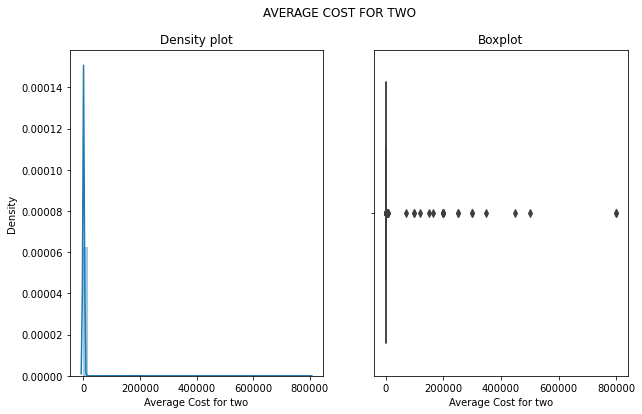

In [35]:
### Plotting distplot and box plot for "Average Cost for two" ... 

plt.rcParams['figure.figsize'] = (10,6)
fig, axes = plt.subplots(1, 2)

sns.distplot(df['Average Cost for two'], ax = axes[0])
sns.boxplot(df['Average Cost for two'], ax = axes[1])
axes[0].set_title("Density plot")
axes[1].set_title("Boxplot")
plt.suptitle("AVERAGE COST FOR TWO")

This distribution seems to be affected by "Outliers". 

lets us get a "Statistical summary" of the variables, remove "Outliers" to get a better understanding of the distribution of "Average Cost" across "Restaurants".

# Statistical Summary :

In [36]:
###Getting a breif Statistical summary of the dataset.

df.describe()

,Average Cost for two,Aggregate rating,Votes
count,9541.000000,9541.000000,9541.000000
mean,1200.368096,2.665088,156.707892
std,16129.588655,1.516596,430.180201
min,0.000000,0.000000,0.000000
25%,250.000000,2.500000,5.000000
50%,400.000000,3.200000,31.000000
75%,700.000000,3.700000,130.000000
max,800000.000000,4.900000,10934.000000


# Outlier Treatment:

Statistical summary shows a mean of "1200", min value of "0", max value of "8000" and a huge std of "16129.58". The distribution is largely affected by "outliers". Lets us filter the "Numeric" Columns in a dataset df[Continous] and remove Outliers from all numeric variables. 

In [37]:
### Separating numeric variables for Outlier treatment .

Continous = df.describe().columns
df[Continous].head(2)

,Average Cost for two,Aggregate rating,Votes
0,800000,4.1,1498
1,800000,4.6,873


In [38]:
### Outlier treatment:

for i in df[Continous]:
    q1,q3 = df[i].quantile([0.25,0.75])
    iqr = q3 - q1
    upper = q3 + 1.5* iqr
    lower = q1 - 1.5* iqr
    df[i] = np.where(df[i]>upper, upper,df[i])
    df[i] = np.where(df[i]<lower,lower,df[i])
    

Text(0.5, 0.98, 'AVERAGE COST FOR TWO')

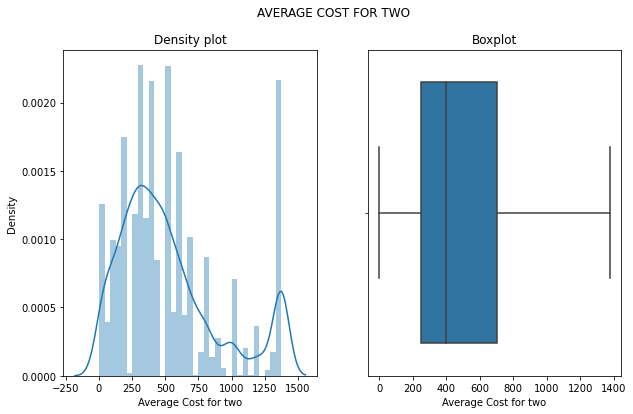

In [39]:
#### Plotting again after "outlier Treatment" :

plt.rcParams['figure.figsize'] = (10,6)
fig, axes = plt.subplots(1, 2)

sns.distplot(df['Average Cost for two'], ax = axes[0])
sns.boxplot(df['Average Cost for two'], ax = axes[1])
axes[0].set_title("Density plot")
axes[1].set_title("Boxplot")
plt.suptitle("AVERAGE COST FOR TWO")

Thus for most of the data, the "Average Cost for two" ranges betweem  0 to 1500

However "Average Cost for two" across different countries is ascribed in different "Currencies", Thus we may not make certain assumptions about distribution of "Cost" across the "Restaurants"

In [40]:
### Exporting and preserving the cleaned data before making further changes for "Dashboarding" in Tableau ...
df.head(2)
df.to_excel('RestaurantData.xlsx')

# 9.How ratings are distributed among the various factors?

To understand the distribution of "Aggregate rating", Let us plot a pair plot for the dataset.

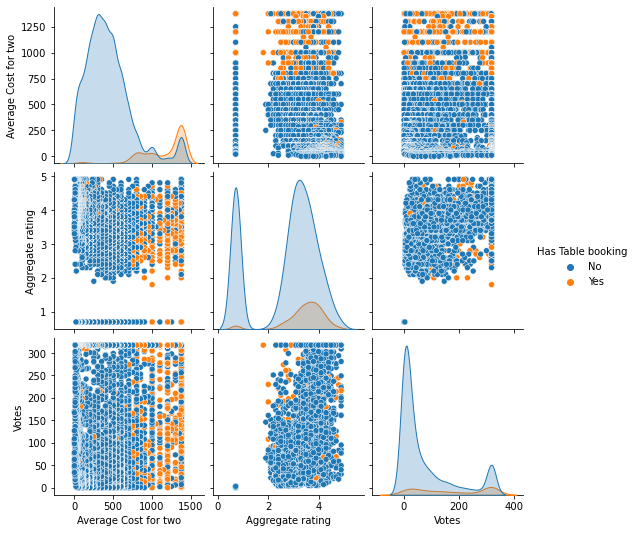

In [41]:
sns.pairplot(df, hue = 'Has Table booking')

Let us plot a "Heatmap" to study "Corelation" between variables.

In [42]:
### Estimating "corelation" between variables
df.corr()

,Average Cost for two,Aggregate rating,Votes
Average Cost for two,1.000000,0.289022,0.358306
Aggregate rating,0.289022,1.000000,0.611190
Votes,0.358306,0.611190,1.000000


<AxesSubplot:>

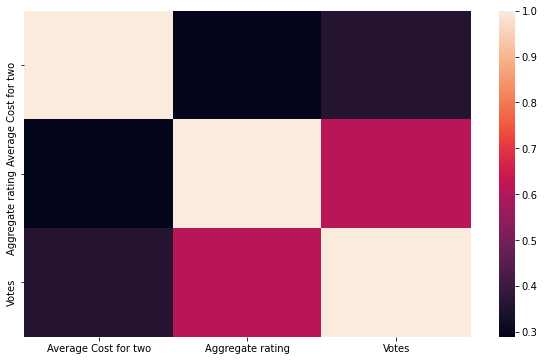

In [43]:
### Plotting corelation : 
sns.heatmap(df.corr())

# Normalisation:

To obtain optimum result we can "Normalize" the continous variables prior to "Modelling"

In [44]:
### Importing "Z score " from scipy.stats
from scipy.stats import zscore
df[Continous].head()

,Average Cost for two,Aggregate rating,Votes
0,1375.0,4.1,317.5
1,1375.0,4.6,317.5
2,1375.0,4.9,317.5
3,1375.0,4.2,317.5
4,1375.0,4.3,243.0


In [45]:
# Applying zscore to df[continous]
df[Continous].apply(zscore).head()

,Average Cost for two,Aggregate rating,Votes
0,2.249647,1.027526,2.128950
1,2.249647,1.429746,2.128950
2,2.249647,1.671078,2.128950
3,2.249647,1.107970,2.128950
4,2.249647,1.188414,1.444827


In [46]:
### Rounding up  we get means = 0 ,std = 1 i.e  (N~(0,1))
df[Continous].apply(zscore).describe().round()

,Average Cost for two,Aggregate rating,Votes
count,9541.0,9541.0,9541.0
mean,0.0,0.0,0.0
std,1.0,1.0,1.0
min,-1.0,-2.0,-1.0
25%,-1.0,-0.0,-1.0
50%,-0.0,0.0,-1.0
75%,0.0,1.0,0.0
max,2.0,2.0,2.0


Post Normalisation the "Mean" of all Continous Variables is "0" and the "Std" is "1" ie,

All continous variable are assuming "Normal Distribution" (N~(0,1))

# Label Encoding:

Let us convert all the "Categorical" variables to "Indicator" Variables by "LabelEncoding" to improve the efficiency of the "Model", since the "Model" cannot comprehend "String" variables.

In [47]:
### Importing "LabelEncoder" from sklearn.preprocessing

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [48]:
### Converting the Categorical variables into "Indicator" variables by "Label Encoding"

df['Restaurant ID'] = encode.fit_transform(df['Restaurant ID'])
#df['Restaurant Name'] = encode.fit_transform(df['Restaurant Name'])
df['Country'] = encode.fit_transform(df['Country'])
df['City'] = encode.fit_transform(df['City'])
df['Cuisines'] = encode.fit_transform(df['Cuisines'])
df['Has Table booking'] = encode.fit_transform(df['Has Table booking'])
df['Has Online delivery'] = encode.fit_transform(df['Has Online delivery'])
df['Rating color'] = encode.fit_transform(df['Rating color'])
df['Rating text'] = encode.fit_transform(df['Rating text'])


df.head()

,Restaurant ID,Restaurant Name,Country,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,No_Cuisine
0,5006,Skye,4,59,1044,1375.0,0,0,3,4.1,1,5,317.5,2
1,5008,Satoo - Hotel Shangri-La,4,59,136,1375.0,0,0,3,4.6,0,1,317.5,3
2,5011,Sushi Masa,4,59,1782,1375.0,0,0,3,4.9,0,1,317.5,2
3,5012,3 Wise Monkeys,4,59,1111,1375.0,0,0,3,4.2,1,5,317.5,1
4,5013,Avec Moi Restaurant and Bar,4,59,923,1375.0,0,0,3,4.3,1,5,243.0,2


The variable, "Restaurant Name" could not be encoded since some "Restaurant Names" had both strings and integers. 

we can accomplish the same by "pd.get_dummies" method but it will add a huge no of columns to the dataset hence rendering the dataset inefficient for "Modelling", thus let us drop the column "Restaurant Name".

In [49]:
### dropping the column"Restaurant Name" 

df.drop('Restaurant Name', axis =1, inplace = True)
df.head(2)

,Restaurant ID,Country,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,No_Cuisine
0,5006,4,59,1044,1375.0,0,0,3,4.1,1,5,317.5,2
1,5008,4,59,136,1375.0,0,0,3,4.6,0,1,317.5,3


# 10.Explain the factors in the data that may have an effect on ratings. For example, number of cuisines, cost, delivery option, etc.



# Modelling

The Dataset is now ready for Modelling, lets Create X(features/predictor) variables and Y (target) variable

In [50]:
#### Extracting the target variable "Aggregate rating", and dropping it from the dataset....

target = df['Aggregate rating']

df.drop('Aggregate rating', axis = 1 , inplace = True)
df.head(2)

,Restaurant ID,Country,City,Cuisines,Average Cost for two,Has Table booking,Has Online delivery,Price range,Rating color,Rating text,Votes,No_Cuisine
0,5006,4,59,1044,1375.0,0,0,3,1,5,317.5,2
1,5008,4,59,136,1375.0,0,0,3,0,1,317.5,3


In [51]:
### creating x(predictor), y(target) variables.. 

X = df.values
y = target.values

Lets import "train_test_split" and "LinearRegression" from sklearn library.

Split the data into "X" and "y" train and test sets, thereafter we can fit the "trainning data" (X_train and y_train) into the Linear Regression algorithm.

We can then make predictions on the "testing set" (X_test) and Finally evaluate the prediction results with the Actual set(y_test).

In [52]:
### Importing "train_test_split" and "LinearRegression" from sklearn.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
### Splitting the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (6678, 12)
X_test: (2863, 12)
y_train: (6678,)
y_test: (2863,)


In [54]:
##  Creating an instance of LINEAR REGRESSION 

LinReg = LinearRegression()

In [55]:
### fitting the data into the model
LinReg.fit(X_train,y_train)

LinearRegression()

In [56]:
### Getting the Coefficients (slopes) for predictor variables and the "y" intercept 

print('The Linear Model Coefficients for the predictor variables are:\n\n',LinReg.coef_)
print('\n')
print('The "y" intercept "Bo" is:\n\n',LinReg.intercept_)

The Linear Model Coefficients for the predictor variables are:

 [-4.44400529e-05  4.49993928e-02 -2.23516686e-03 -1.91586008e-04
 -4.48257740e-05 -2.27927849e-01  2.62905800e-01  2.95732848e-01
 -1.57460798e-01 -1.99511280e-01  5.50840038e-03  3.80333213e-02]


The "y" intercept "Bo" is:

 2.9483654623677227


# Prediction:

In [57]:
#### prediction :
y_pred = LinReg.predict(X_test)
y_pred[0:30]

array([1.85292955, 2.01602139, 2.62815134, 2.43181425, 2.27200532,
       3.0865376 , 2.41276033, 3.9665564 , 2.23695816, 2.35734943,
       2.81253045, 3.46413337, 2.79457484, 3.04075326, 3.62243621,
       2.77142083, 2.4424875 , 2.98452523, 3.06589286, 2.22481957,
       3.76972724, 2.69166774, 3.0208265 , 2.10016981, 2.10911433,
       1.65543089, 2.59742762, 2.70752158, 3.38789941, 2.66474977])

# Evaluation:

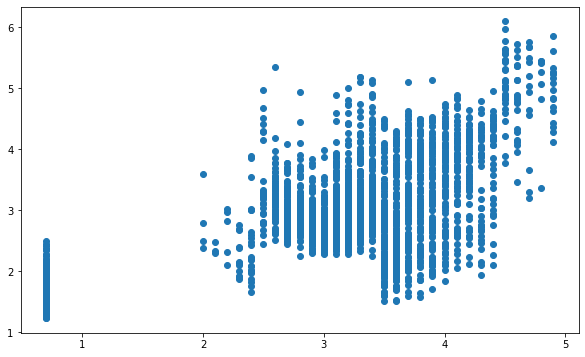

In [58]:
### Plotting the Actual Vs predicted values:

plt.scatter(y_test,y_pred)

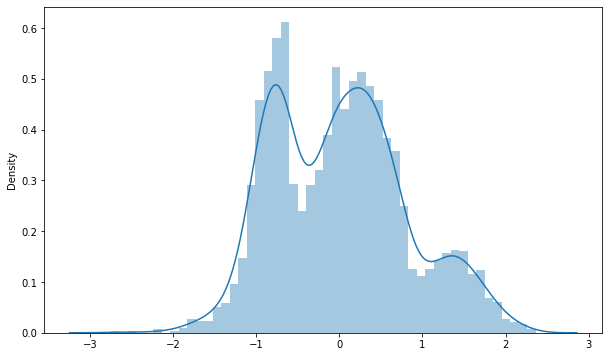

In [59]:
## Residual Histogram
sns.distplot((y_test-y_pred),bins=50);

In [60]:
## Importing metrics from and Calculating "MAE","MSE","RMSE","Efficiency"

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Efficiency', metrics.r2_score(y_test, y_pred))

MAE: 0.6605759292729237
MSE: 0.6546678862153457
RMSE: 0.8091154962150617
Efficiency 0.569401282530472


Thus the Prediction accuracy obtained for the above model is 56%

# Dashboarding:



# 11.Visualize the variables using Tableau to help user explore the data and create a better understanding of the restaurants to identify the ‘’star’’ restaurant



# 12.Demonstrate the variables associated with each other and factors to build a dashboard

The above cleaned dataset was exported as "RestaurantData.xlsx" by "df.to_excel('RestaurantData.xlsx')" method and used for "Dashboarding" in "TABLEAU".

The same was saved on to the "Tableau public server", the link to access the "Dashboard" is...
"https://public.tableau.com/app/profile/syeda.tasneem.fatima/viz/RastaurantAnalysisDashboard/Dashboard1?publish=yes"

